# Exercise 4.3

Fourier transform of a time signal helps us to understand the component frequencies present in that
signal. A seemingly noisy signal in time domain can show useful patterns (dominating frequencies)
in the frequency domain. <br/>

Apply FFT on the raw data and visualize the proportions of component frequencies under the following
conditions,

In [254]:
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as ss

In [255]:
#read files
df_acc_x = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", sep='\s+',header=None)
df_acc_y = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", sep='\s+', header=None)
df_acc_z = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt", sep='\s+', header=None)
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header=None)
body_acc_x = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", sep='\s+' ,header=None)
body_acc_y = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", sep='\s+' ,header=None)
body_acc_z = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", sep='\s+' ,header=None)
x_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+' ,header=None)
activity_label =  pd.read_csv("./UCI HAR Dataset/activity_labels.txt", sep='\s+' ,header=None)

## 4.3(a)

### (a) Before and after using any filters for pre-processing

In [257]:
#function to FFT
def graphFFT(data):
    fft_data = fft(data)
    sample_freq = fftfreq(fft_data.size, d=0.02)
    # Find the peak frequency: we can focus on only the positive frequencies
    pos_mask = np.where(sample_freq >= 0)
    freqs = sample_freq[pos_mask]
    power = np.abs(fft_data[0:fft_data.size//2])
    return freqs,power

#plot freq graph after FFT
def plot_mean_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n].iloc[i])
            power_sum += power
        power_sum = power_sum/data[n].shape[0]
        plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')

#### No Filter

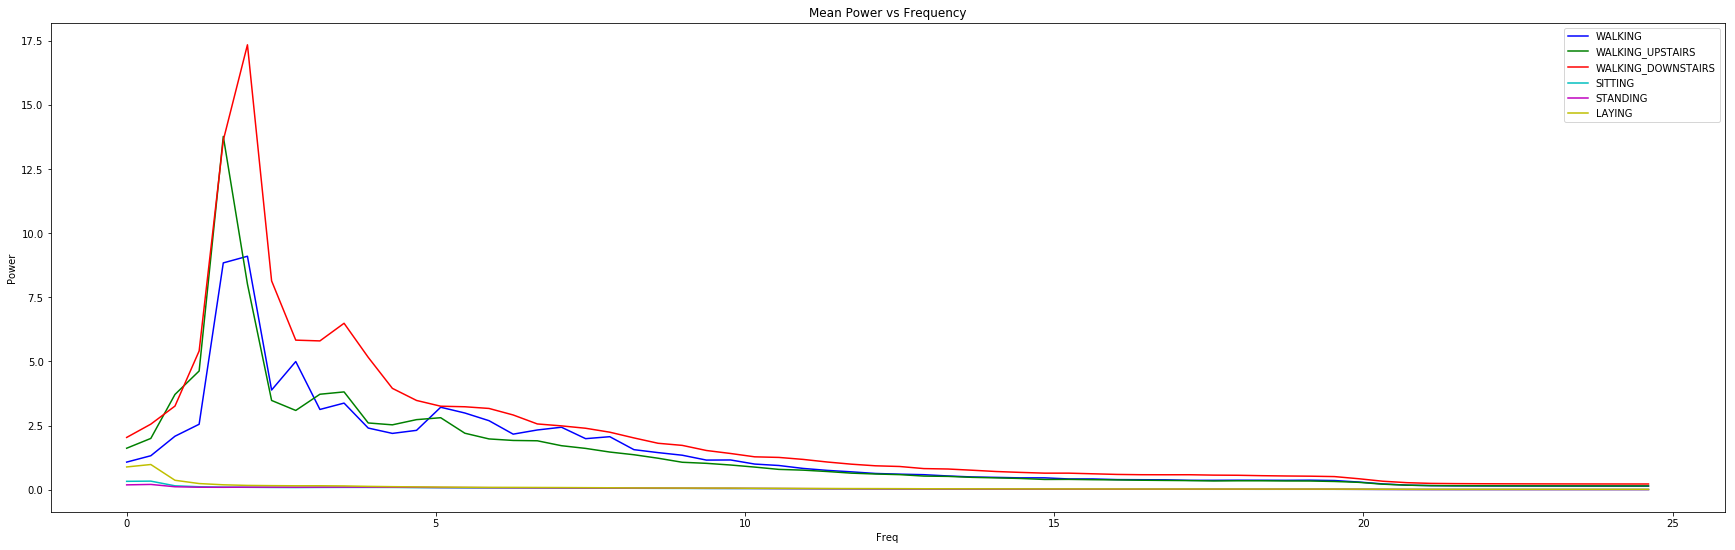

In [275]:
#Plot freq graph
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list = []
plt.figure(figsize=(30,9))
for x in labels:
    globals()['data_x_%s' % x] = body_acc_x.iloc[np.where(y_train.iloc[:,0]==x)]
    data_list.append(globals()['data_x_%s' % x])

plot_mean_FFT(data_list,len(data_list),colours,activity_label.iloc[:,1].values)

In [259]:
# Functions to filter data
def butter_pass(cutoff, fs, order=5, filter_type='low'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = ss.butter(order, normal_cutoff, btype=filter_type, analog=False)
    return b, a

def butter_filter(data, cutoff, fs, order=5, filter_type='low'):
    b, a = butter_pass(cutoff, fs, order=order, filter_type= filter_type)
    y = ss.lfilter(b, a, data)
    return y

#plot freq graph after FFT
def plot_mean_filtered_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n][i])
            power_sum += power
        power_sum = power_sum/data[n].shape[0]
        plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')


#### Low-pass filter

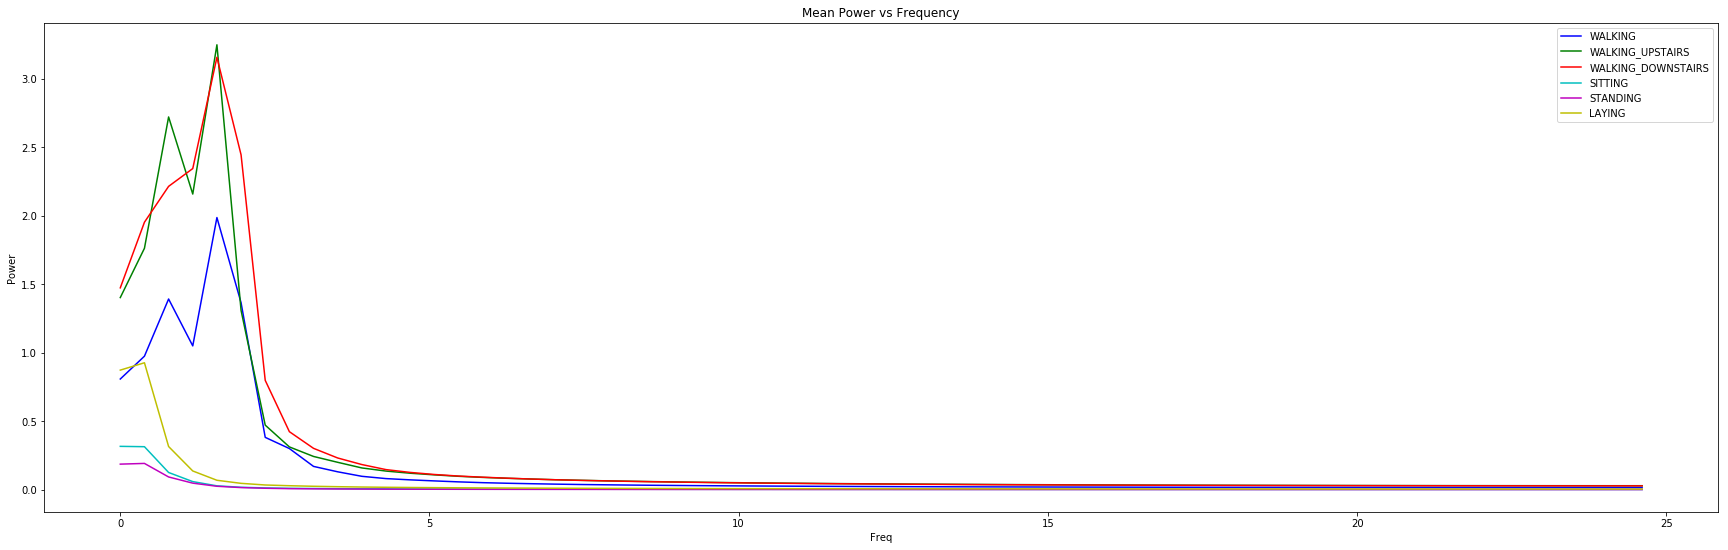

In [283]:
# Low-pass Filter
order = 3
fs = 50     # sample rate, Hz
cutoff = 1  # desired cutoff frequency of the filter, Hz
filter_type = 'low'

low_filtered = butter_filter(body_acc_x,cutoff,fs,order,filter_type)
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list_low = []
plt.figure(figsize=(30,9))
for x in labels:
    globals()['data_low_x_%s' % x] = low_filtered[np.where(y_train.iloc[:,0]==x)]
    data_list_low.append(globals()['data_low_x_%s' % x])

plot_mean_filtered_FFT(data_list_low,len(data_list_low),colours,activity_label.iloc[:,1].values)

#### High-pass filter

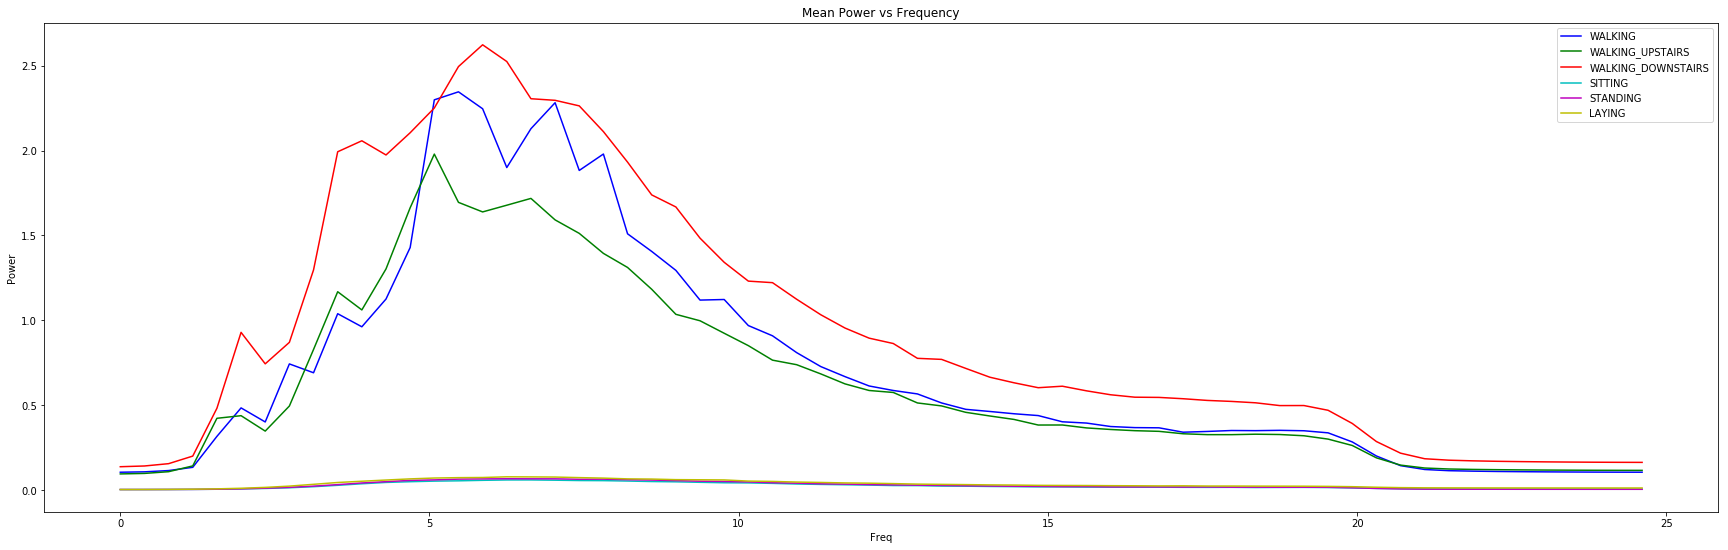

In [284]:
# High-pass Filter
order = 3
fs = 50     # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
filter_type = 'high'

high_filtered = butter_filter(body_acc_x,cutoff,fs,order,filter_type)
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list_high = []
plt.figure(figsize=(30,9))
for x in labels:
    globals()['data_high_x_%s' % x] = high_filtered[np.where(y_train.iloc[:,0]==x)]
    data_list_high.append(globals()['data_high_x_%s' % x])

plot_mean_filtered_FFT(data_list_high,len(data_list_high),colours,activity_label.iloc[:,1].values)

### (b) For a short sequence of walking and being idle

In [262]:
#plot freq graph after FFT
def plot_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n].iloc[i])
            power_sum += power
        #power_sum = power_sum/data[n].shape[0]
    plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')

In [263]:
#prepare data for comparison
import random
random.seed(1)
rand_walking = random.sample(range(0,data_x_1.shape[0]),2)
rand_laying = random.sample(range(0,data_x_6.shape[0]),2)

walk_walk = data_x_1.iloc[rand_walking[0]].append(data_x_1.iloc[rand_walking[1]])
lay_lay = data_x_6.iloc[rand_laying[0]].append(data_x_6.iloc[rand_laying[1]])

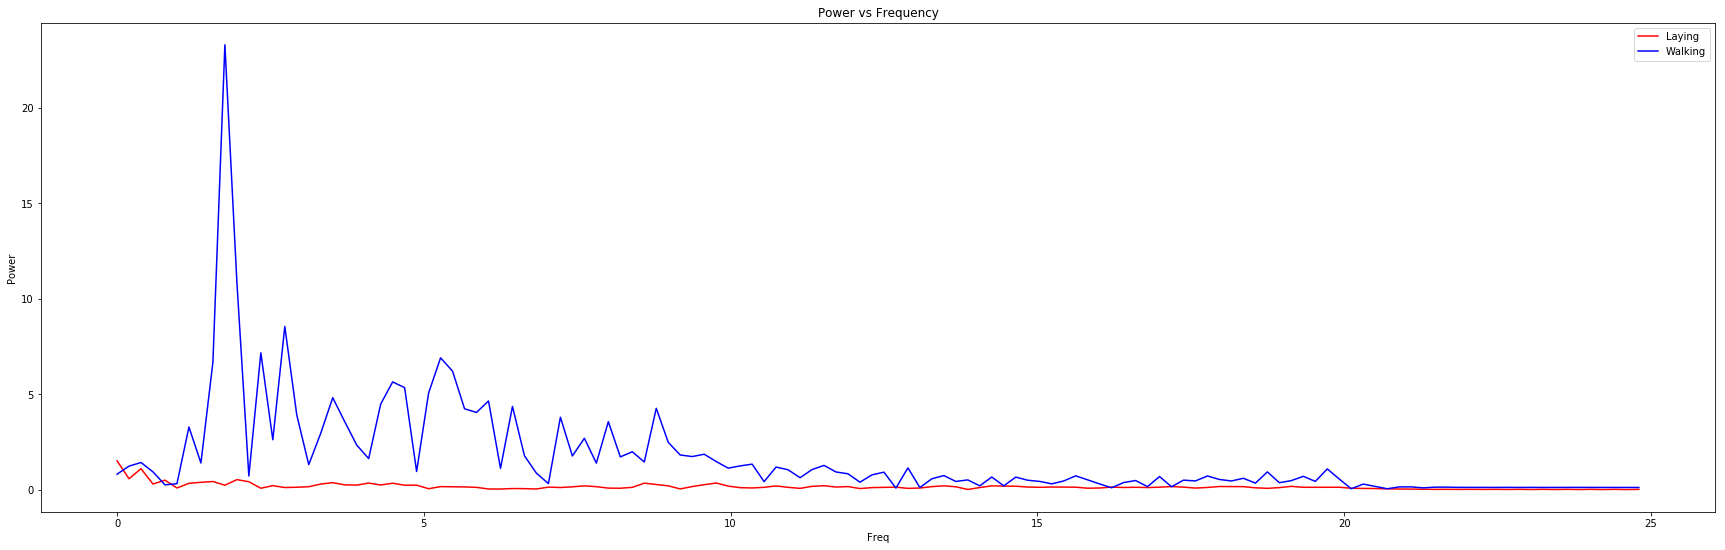

In [272]:
freqs,power = graphFFT(lay_lay)
f,p = graphFFT(walk_walk)
plt.figure(figsize=(30,9))
plt.plot(freqs,power,color='r',label='Laying')
plt.plot(f,p,color='b',label='Walking')
plt.legend()
plt.ylabel('Power')
plt.xlabel('Freq')
plt.title('Power vs Frequency')
plt.show()

A small sample of data is sufficient to discriminate between walking and laying as walking has several characteristic frequencies which a flat for laying.

### 4.3(b)

#### Comparing FFT Coefficients for different activties


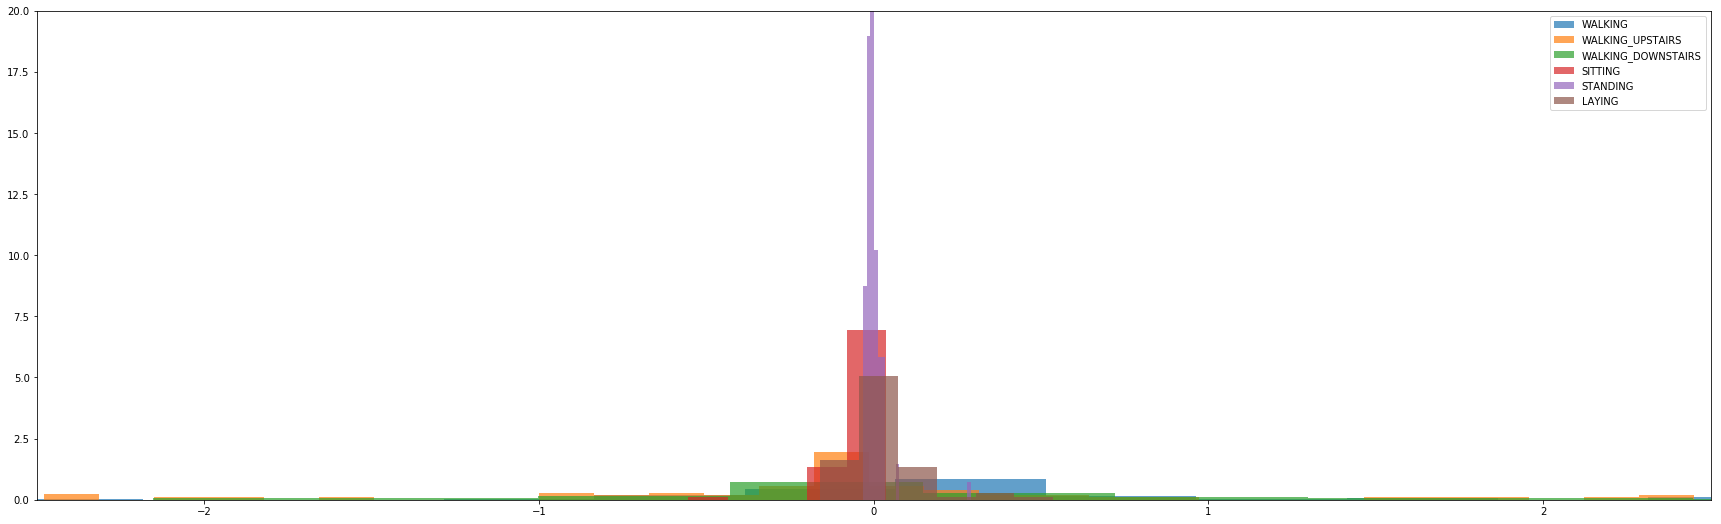

In [268]:
fig, ax = plt.subplots(figsize=(30,9))

colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,1].values

ax.hist(np.real(fft(data_x_1.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_2.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_3.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_4.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_5.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_6.iloc[0])), bins=30, density=1, alpha=0.7)
plt.xlim([-2.5,2.5])
plt.ylim([0,20])
plt.legend(labels)
plt.show()


From the distribution of coefficient values, we can discrimiate between walking activities and the others (sitting, standing,laying). Normal walking can be discriminated from walking upstairs and downstairs as the coefficients are only positive for walking activities. 